In [5]:
%matplotlib inline
import matplotlib.pyplot as plt 
from sklearn.datasets import load_digits
digits = load_digits()

In [6]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [7]:
print(digits.target[0])

0


In [11]:
print('전체 샘플의 수 : {}'.format(len(digits.images)))

전체 샘플의 수 : 1797


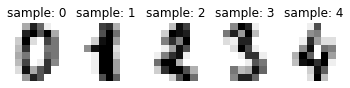

In [37]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]): # 5개의 샘플만 출력
    plt.subplot(1, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample: %i' % label)

In [38]:
print(digits.data[0]) # 8x8 => 64차원의 벡터

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [46]:
X = digits.data # 이미지. 즉, 특성 행렬
Y = digits.target # 각 이미지에 대한 레이블
print(X)
print(Y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [40]:
# 다층 퍼셉트론 분류기
import torch
import torch.nn as nn
from torch import optim

In [42]:
model = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32,16),
    nn.ReLU(),
    nn.Linear(16,10)
)

In [47]:
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)
print(X)
print(Y)

tensor([[ 0.,  0.,  5.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ..., 10.,  0.,  0.],
        [ 0.,  0.,  0.,  ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1.,  ...,  6.,  0.,  0.],
        [ 0.,  0.,  2.,  ..., 12.,  0.,  0.],
        [ 0.,  0., 10.,  ..., 12.,  1.,  0.]])
tensor([0, 1, 2,  ..., 8, 9, 8])


In [48]:
loss_fn =  nn.CrossEntropyLoss() # softmax 함수 포함 

In [49]:
optimizer = optim.Adam(model.parameters())

In [50]:
losses = []

Epoch    0/100 Cost: 2.621035
Epoch   10/100 Cost: 2.100744
Epoch   20/100 Cost: 1.818078
Epoch   30/100 Cost: 1.507683
Epoch   40/100 Cost: 1.164329
Epoch   50/100 Cost: 0.852601
Epoch   60/100 Cost: 0.614365
Epoch   70/100 Cost: 0.452750
Epoch   80/100 Cost: 0.347118
Epoch   90/100 Cost: 0.276174


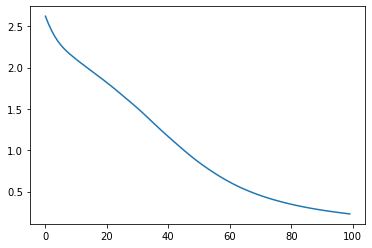

In [51]:
for epoch in range(100):
    optimizer.zero_grad()
    y_pred = model(X) # forwar 연산
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, 100, loss.item()
        ))
    losses.append(loss.item())
plt.plot(losses)